De dataset inladen


In [20]:
from sklearn.datasets import make_moons
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler

In [21]:
filename='Clustering_gmm (2).csv'

#Read csv
df = pd.read_csv(filename)
df.head()

,Weight,Height
0,67.062924,176.086355
1,68.804094,178.388669
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679


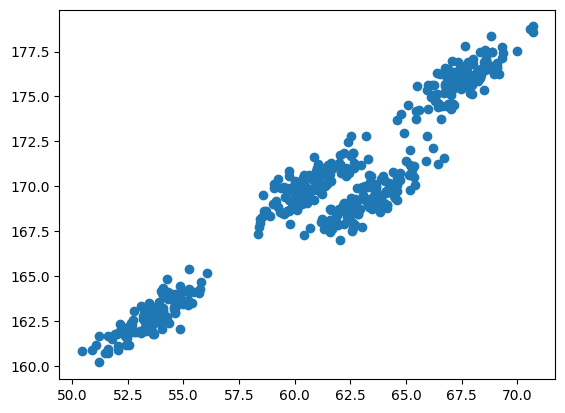

In [22]:
plt.scatter(df["Weight"],df["Height"])


In [31]:
Clus_dataSet = df[['Weight','Height']]
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)
eps = 0.1
min_samples = 4

db = DBSCAN(eps=eps, min_samples=min_samples).fit(Clus_dataSet)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
df["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 


# A sample of clusters
df[["Weight","Height"]].head(5)

,Weight,Height
0,67.062924,176.086355
1,68.804094,178.388669
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679


In [32]:
set(labels)

{-1, 0, 1, 2, 3}

In [33]:
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))

Cluster 0, Avg Weight: 67.54715241976423
Cluster 0, Avg Height: 176.01635939218215

Cluster 1, Avg Weight: 60.627193694056935
Cluster 1, Avg Height: 169.9870612360557

Cluster 2, Avg Weight: 63.208149885959976
Cluster 2, Avg Height: 169.19373505213122

Cluster 3, Avg Weight: 53.64121100083361
Cluster 3, Avg Height: 162.77983151875014



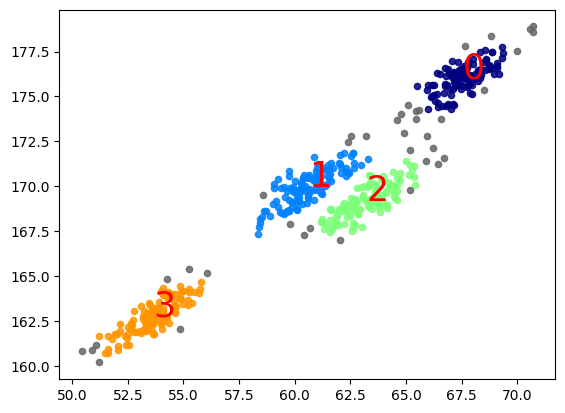

In [38]:
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[int(clust_number)])
    clust_set = df[df.Clus_Db == clust_number]                    
    plt.scatter(clust_set.Weight, clust_set.Height, color =c,  marker='o', s= 20, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.Weight) 
        ceny=np.mean(clust_set.Height) 
        plt.text(cenx,ceny,str(clust_number), fontsize=25, color='red',)
        print ("Cluster "+str(clust_number)+', Avg Weight: '+ str(np.mean(clust_set.Weight)))
        print ("Cluster "+str(clust_number)+', Avg Height: '+ str(np.mean(clust_set.Height))+"\n")